# Proyecto 1: Predicción de ventas a partir de cantidades productos

## Fase 0 - CONFIGURACIÓN DEL ENTORNO Y CARGA DE DATOS

### Paso 0.1: Importación de Librerías

In [1]:
# -*- coding: utf-8 -*-
# =============================================================================
# FASE 0: CONFIGURACIÓN DEL ENTORNO Y CARGA DE DATOS
# =============================================================================
# Objetivo: Importar librerías, definir rutas de archivos y cargar los
#           datos iniciales de inventario y ventas.
#
# Entregable: DataFrames de pandas con los datos crudos y una primera
#             inspección para verificar la carga correcta.
# =============================================================================

# -----------------------------------------------------------------------------
# Paso 0.1: Importación de Librerías
# -----------------------------------------------------------------------------
# Importamos las librerías que usaremos a lo largo del proyecto.
# - pandas: Para la manipulación y análisis de datos tabulares.
# - numpy: Para operaciones numéricas eficientes.
# - matplotlib y seaborn: Para la visualización de datos.
# -----------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Librerías importadas correctamente.")



✅ Librerías importadas correctamente.


### Paso 0.2: Definición de Rutas y Carga de Datos

In [2]:
# -----------------------------------------------------------------------------
# Paso 0.2: Definición de Rutas y Carga de Datos
# -----------------------------------------------------------------------------
# Define las rutas a tus archivos de datos.
# ⚠️ ¡IMPORTANTE! Reemplaza 'ruta/a/tu/archivo_inventario.csv' y
# 'ruta/a/tu/archivo_ventas.csv' con las rutas reales de tus archivos.
# -----------------------------------------------------------------------------
ruta_inventario = 'C:/Users/wild-/OneDrive/Escritorio/Proyectos/ALECO/archivo_inventario.xlsx'
ruta_ventas = 'C:/Users/wild-/OneDrive/Escritorio/Proyectos/ALECO/archivo_ventas.xlsx'


df_inventario_raw = pd.read_excel(ruta_inventario)
df_ventas_raw = pd.read_excel(ruta_ventas)

# Verificamos que los DataFrames no estén vacíos antes de inspeccionarlos
if not df_inventario_raw.empty and not df_ventas_raw.empty:
    print("\n" + "="*50)
    print("INSPECCIÓN INICIAL: BASE DE DATOS DE INVENTARIO")
    print("="*50)

    # Mostramos las primeras 5 filas para ver la estructura
    print("\n--- Primeras 5 filas (head): ---")
    display(df_inventario_raw.head())

    # Obtenemos un resumen técnico: número de filas, columnas, tipos de datos y nulos
    print("\n--- Información general (info): ---")
    df_inventario_raw.info()

    print("\n" + "="*50)
    print("INSPECCIÓN INICIAL: BASE DE DATOS DE VENTAS")
    print("="*50)

    # Mostramos las primeras 5 filas
    print("\n--- Primeras 5 filas (head): ---")
    display(df_ventas_raw.head())

    # Obtenemos el resumen técnico
    print("\n--- Información general (info): ---")
    df_ventas_raw.info()
else:
    print("\n⚠️ No se pueden inspeccionar los datos porque no se cargaron correctamente.")



INSPECCIÓN INICIAL: BASE DE DATOS DE INVENTARIO

--- Primeras 5 filas (head): ---


,Mes,Categoría,Ítem,Referencia,Descripción,Cantidad en Principal,Cantidad mínima en Principal,Cantidad máxima en Principal,Cantidad total,Cantidad en remisiones,Unidad,Estado,Costo promedio,Total
0,Mayo,EMPAQUES Y OTROS,GARRAFA,NaN,NaN,0.0,0,0,0.0,0,Unidad,Activo,5900.000000,0.00
1,Mayo,EMPAQUES Y OTROS,GALON,NaN,NaN,-10.0,0,0,276.0,0,Unidad,Activo,1387.804991,-13878.05
2,Mayo,EMPAQUES Y OTROS,1 LIT C/PISTOLA,NaN,NaN,-2.0,10,30,-2.0,0,Unidad,Inactivo,1232.895738,-2465.79
3,Mayo,EMPAQUES Y OTROS,PETT 500 ML C/PISTOLA,NaN,NaN,-24.0,10,30,-24.0,0,Unidad,Inactivo,1217.666667,-29224.00
4,Mayo,EMPAQUES Y OTROS,JABONERO LIT C/CREMERA,NaN,NaN,0.0,6,20,0.0,0,Unidad,Activo,1857.000000,0.00



--- Información general (info): ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Mes                           2940 non-null   object 
 1   Categoría                     2936 non-null   object 
 2   Ítem                          2940 non-null   object 
 3   Referencia                    2050 non-null   object 
 4   Descripción                   63 non-null     object 
 5   Cantidad en Principal         2940 non-null   float64
 6   Cantidad mínima en Principal  2940 non-null   int64  
 7   Cantidad máxima en Principal  2940 non-null   int64  
 8   Cantidad total                2940 non-null   float64
 9   Cantidad en remisiones        2940 non-null   int64  
 10  Unidad                        2940 non-null   object 
 11  Estado                        2940 non-null   object 
 12  Costo promedio           

,Número de comprobante,Estado,Cliente,Creación,Subtotal,Descuento,Antes de impuestos,Impuestos,Después de impuestos
0,PV28325,Cobrada,MARIA HELENA GARCIA,1/4/2025,154800,0.0,154800.0,0,154800.0
1,PV28590,Cobrada,JHON EDINSON V,1/4/2025,139700,5993.9,133706.1,0,133706.1
2,PV28591,Cobrada,MILENA LUCHO,1/4/2025,81500,1008.9,80491.1,0,80491.1
3,PV28592,Cobrada,Consumidor final,1/4/2025,17100,495.9,16604.1,0,16604.1
4,PV28593,Cobrada,Consumidor final,1/4/2025,6800,0.0,6800.0,0,6800.0



--- Información general (info): ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2107 entries, 0 to 2106
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Número de comprobante  2107 non-null   object 
 1   Estado                 2107 non-null   object 
 2   Cliente                2107 non-null   object 
 3   Creación               2107 non-null   object 
 4   Subtotal               2107 non-null   int64  
 5   Descuento              2107 non-null   float64
 6   Antes de impuestos     2107 non-null   float64
 7   Impuestos              2107 non-null   int64  
 8   Después de impuestos   2107 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 148.3+ KB


## FASE 1: INTEGRACIÓN Y LIMPIEZA DE DATOS

### Paso 1.1: Procesar y Agregar Datos de Ventas

In [3]:
print("Iniciando procesamiento de datos de ventas...")

# Copiamos para no modificar el dataframe original
df_ventas_proc = df_ventas_raw.copy()

# Filtrar solo por ventas efectivas (ej. 'Cobrada')
# ⚠️ Ajusta el valor 'Cobrada' si en tus datos hay otros estados válidos.
df_ventas_proc = df_ventas_proc[df_ventas_proc['Estado'] == 'Cobrada']

# Convertir la columna 'Creación' a formato de fecha
# El formato '%d/%m/%Y' se ajusta a '1/4/2025'.
df_ventas_proc['Fecha'] = pd.to_datetime(df_ventas_proc['Creación'], format='%d/%m/%Y')

# Crear una columna 'Mes_Ano' para la agregación (ej. '2025-04')
df_ventas_proc['Mes_Ano'] = df_ventas_proc['Fecha'].dt.to_period('M')

# Agrupar por 'Mes_Ano' y sumar los ingresos
df_ingresos_mensuales = df_ventas_proc.groupby('Mes_Ano')['Después de impuestos'].sum().reset_index()
df_ingresos_mensuales.rename(columns={'Después de impuestos': 'Ingresos_Totales'}, inplace=True)

print("✅ Datos de ventas agregados por mes.")
display(df_ingresos_mensuales.head())

Iniciando procesamiento de datos de ventas...
✅ Datos de ventas agregados por mes.


,Mes_Ano,Ingresos_Totales
0,2025-04,18551362.6
1,2025-05,20730074.9
2,2025-06,18292021.7
3,2025-07,17547081.4


### Paso 1.2: Procesar y Pivotar Datos de Inventario

In [4]:
print("\nIniciando procesamiento de datos de inventario...")

df_inventario_proc = df_inventario_raw.copy()

# Crear una columna de fecha a partir de la columna 'Mes'
# ⚠️ Esta es una aproximación. Asume que los datos son del mismo año.
# Si tienes datos de varios años, necesitarás una columna de año en tu CSV.
# Aquí mapeamos nombres de meses a números.
meses_map = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}
df_inventario_proc['Mes_Num'] = df_inventario_proc['Mes'].map(meses_map)

# Asumimos un año para crear la fecha. ⚠️ ¡Revisar si es correcto!
# Si tienes una columna de año, úsala aquí.
ANO_DATOS = 2025 # Cambia este valor por el año correcto de tus datos
df_inventario_proc['Fecha'] = pd.to_datetime(dict(year=ANO_DATOS, month=df_inventario_proc['Mes_Num'], day=1))
df_inventario_proc['Mes_Ano'] = df_inventario_proc['Fecha'].dt.to_period('M')


# Pivotar la tabla
# - index: lo que se mantendrá como filas (Mes_Ano)
# - columns: la columna cuyos valores se convertirán en nuevas columnas (Ítem)
# - values: los valores que llenarán las nuevas columnas (Cantidad total)
df_inventario_pivot = df_inventario_proc.pivot_table(
    index='Mes_Ano',
    columns='Ítem',
    values='Cantidad total',
    aggfunc='sum' # Usamos suma por si hay duplicados
).fillna(0) # Rellenamos NaNs con 0, asumiendo que significa sin stock

# Limpiar los nombres de las columnas para que sean válidos
df_inventario_pivot.columns = [f"INV_{col.replace(' ', '_').replace('/', '_')}" for col in df_inventario_pivot.columns]


print("✅ Datos de inventario pivotados.")
display(df_inventario_pivot.head())



Iniciando procesamiento de datos de inventario...
✅ Datos de inventario pivotados.


,INV_1_L_PETT,INV_1_LIT_BLANCO,INV_1_LIT_C_PISTOLA,INV_1_2_GALON,INV_500_BLANCO_C_TAPA,INV_ACIDO_BORICO__1_4_LIBRA,INV_ACIDO_BORICO_1_2_LIBRA,INV_ACIDO_BORICO_KG,INV_ACIDO_BORICO_LB,INV_ACIDO_OXALICO__1_4_LIBRA,...,INV_VENENO_2_L,INV_VENENO_GALON,INV_VENENO_GARRAFA,INV_VENENO_LIBRA,INV_VENENO_LIBRA_C_PISTOLA,INV_VINALIMPIO_1_L,INV_VINALIMPIO_2_L,INV_VINALIMPIO_GALON,INV_VINALIMPIO_GARRAFA,INV_ZABRA
Mes_Ano,,,,,,,,,,,,,,,,,,,,,
2025-04,9.0,139.0,-2.0,76.0,0.0,32.0,37.0,0.0,9.0,2.0,...,5.0,3.0,0.0,8.0,4.0,12.0,1.0,0.0,2.0,11.0
2025-05,9.0,70.0,-2.0,56.0,0.0,3.0,10.0,0.0,1.0,1.0,...,8.0,-2.0,0.0,3.0,0.0,11.0,10.0,11.0,3.0,11.0
2025-06,9.0,103.0,-2.0,20.0,0.0,42.0,31.0,0.0,14.0,1.0,...,2.0,4.0,0.0,7.0,5.0,37.0,10.0,14.0,2.0,11.0
2025-07,9.0,244.0,-2.0,112.0,0.0,6.0,17.0,0.0,12.0,0.0,...,0.0,-2.0,0.0,0.0,0.0,24.0,5.0,25.0,2.0,11.0


### Paso 1.3: Unir en un DataFrame Maestro

In [5]:
print("\nUniendo tablas para crear el DataFrame maestro...")

# Unimos usando 'Mes_Ano' como clave
df_master = pd.merge(
    df_ingresos_mensuales,
    df_inventario_pivot,
    on='Mes_Ano',
    how='inner' # 'inner' join para mantener solo los meses con datos en ambas tablas
)

# Convertir el índice a un timestamp para facilitar el ploteo
df_master['Mes_Ano'] = df_master['Mes_Ano'].dt.to_timestamp()
df_master.set_index('Mes_Ano', inplace=True)


print("✅ ¡DataFrame maestro creado exitosamente!")
print(f"Dimensiones de la tabla final: {df_master.shape[0]} filas y {df_master.shape[1]} columnas.")
display(df_master.head())



Uniendo tablas para crear el DataFrame maestro...
✅ ¡DataFrame maestro creado exitosamente!
Dimensiones de la tabla final: 4 filas y 746 columnas.


,Ingresos_Totales,INV_1_L_PETT,INV_1_LIT_BLANCO,INV_1_LIT_C_PISTOLA,INV_1_2_GALON,INV_500_BLANCO_C_TAPA,INV_ACIDO_BORICO__1_4_LIBRA,INV_ACIDO_BORICO_1_2_LIBRA,INV_ACIDO_BORICO_KG,INV_ACIDO_BORICO_LB,...,INV_VENENO_2_L,INV_VENENO_GALON,INV_VENENO_GARRAFA,INV_VENENO_LIBRA,INV_VENENO_LIBRA_C_PISTOLA,INV_VINALIMPIO_1_L,INV_VINALIMPIO_2_L,INV_VINALIMPIO_GALON,INV_VINALIMPIO_GARRAFA,INV_ZABRA
Mes_Ano,,,,,,,,,,,,,,,,,,,,,
2025-04-01,18551362.6,9.0,139.0,-2.0,76.0,0.0,32.0,37.0,0.0,9.0,...,5.0,3.0,0.0,8.0,4.0,12.0,1.0,0.0,2.0,11.0
2025-05-01,20730074.9,9.0,70.0,-2.0,56.0,0.0,3.0,10.0,0.0,1.0,...,8.0,-2.0,0.0,3.0,0.0,11.0,10.0,11.0,3.0,11.0
2025-06-01,18292021.7,9.0,103.0,-2.0,20.0,0.0,42.0,31.0,0.0,14.0,...,2.0,4.0,0.0,7.0,5.0,37.0,10.0,14.0,2.0,11.0
2025-07-01,17547081.4,9.0,244.0,-2.0,112.0,0.0,6.0,17.0,0.0,12.0,...,0.0,-2.0,0.0,0.0,0.0,24.0,5.0,25.0,2.0,11.0


## FASE 2: ANÁLISIS EXPLORATORIO DE DATOS (EDA)

### Paso 2.0: Descriptivas inventario

In [6]:
frecuencia_productos = df_inventario_raw['Ítem'].value_counts().reset_index()
frecuencia_productos.columns = ['Producto', 'Meses_con_Registro']

print("\n--- Frecuencia de Registro de Inventario por Producto ---")
print("Mostrando los productos con más registros de inventario a lo largo del tiempo.")
display(frecuencia_productos.head(15))

print("\n--- Productos con Menos Registros de Inventario ---")
print("Estos productos aparecen en menos meses, pueden ser nuevos, estacionales o descontinuados.")
display(frecuencia_productos.tail(15))


--- Frecuencia de Registro de Inventario por Producto ---
Mostrando los productos con más registros de inventario a lo largo del tiempo.


,Producto,Meses_con_Registro
0,MUESTRA X 100 ML,8
1,GARRAFA,4
2,PRESERVANTE INDUSTRIAL,4
3,CAJA LOCION BIG MONZA X 100 ML CABALLERO,4
4,CAJA LOCION INVICTUS X 100 ML,4
5,CAJA LOCION SILK X 100 ML DAMA,4
6,CAJA LOCION SILK X 100 ML CABALLERO,4
7,FRAGANCIA EUCALIPTO GR,4
8,LIMPIA PISOS CANELA MANZAN GAL,4
9,ACIDO SULFONICO,4



--- Productos con Menos Registros de Inventario ---
Estos productos aparecen en menos meses, pueden ser nuevos, estacionales o descontinuados.


,Producto,Meses_con_Registro
730,LIMPIA PISOS ANTIBACTERIAL BRISA MARINA GAL,2
731,AMBIENTADOR SPRAY MARACUYA 500ML,2
732,LIMPIA PISOS ANTIBACTERIAL MARACUYA GALON,2
733,LIMPIA PISOS ANTIBACTERIAL BRISA MARINA 1L,2
734,LIMPIA PISOS ANTIBACTERIAL MARACUYA 1L,2
735,ENVASE TRANSPARENTE BOCA ANCHA X 250ML,1
736,ENVASE TRANSPARENTE BOCA ANCHA 500 ML,1
737,ENVASE TRANSPARENTE BOCA ANCHA 1000 ML,1
738,PERFUME AHLI VEGA - ILMIN (U),1
739,COLONIA ARRURU GR,1


In [7]:
print("--- Estadísticas Descriptivas de Ingresos Totales Mensuales ---")
print("Estos valores resumen la distribución de tus ingresos totales a lo largo de los meses analizados.")

# Usamos .describe() para obtener las estadísticas principales
stats_ventas = df_master['Ingresos_Totales'].describe()

# Damos formato a los números para que sean más legibles
stats_ventas_formatted = stats_ventas.apply(lambda x: f"{x:,.2f}")
display(stats_ventas_formatted)


--- Estadísticas Descriptivas de Ingresos Totales Mensuales ---
Estos valores resumen la distribución de tus ingresos totales a lo largo de los meses analizados.


count             4.00
mean     18,780,135.15
std       1,367,878.92
min      17,547,081.40
25%      18,105,786.62
50%      18,421,692.15
75%      19,096,040.68
max      20,730,074.90
Name: Ingresos_Totales, dtype: object

In [8]:
print("\n\n--- Estadísticas Descriptivas del Inventario por Producto ---")
print("A continuación se muestran los productos con el mayor inventario promedio y la mayor variabilidad.")

# Seleccionar solo las columnas de inventario
columnas_inventario = [col for col in df_master.columns if col.startswith('INV_')]
df_inventario_stats = df_master[columnas_inventario]

# Calcular las estadísticas para cada columna de producto y transponer la tabla
stats_inventario = df_inventario_stats.describe().transpose()

# Renombrar columnas para claridad
stats_inventario.columns = ['Conteo', 'Media', 'Desv_Estándar', 'Mínimo', '25%', '50%', '75%', 'Máximo']


print("\n--- Top 10 Productos con Mayor Inventario Promedio (Media) ---")
print("Estos son los productos que, en promedio, tienen más unidades en stock al final del mes.")
display(stats_inventario.sort_values(by='Media', ascending=False).head(10))

print("\n--- Top 10 Productos con Mayor Variabilidad de Inventario (Desv. Estándar) ---")
print("El inventario de estos productos fluctúa más a lo largo de los meses.")
display(stats_inventario.sort_values(by='Desv_Estándar', ascending=False).head(10))



--- Estadísticas Descriptivas del Inventario por Producto ---
A continuación se muestran los productos con el mayor inventario promedio y la mayor variabilidad.

--- Top 10 Productos con Mayor Inventario Promedio (Media) ---
Estos son los productos que, en promedio, tienen más unidades en stock al final del mes.


,Conteo,Media,Desv_Estándar,Mínimo,25%,50%,75%,Máximo
INV_BASE_P_ANTIBACTERIAL,4.0,27398.00,0.000000,27398.0,27398.00,27398.0,27398.00,27398.0
INV_ACIDO_SULFONICO,4.0,25250.00,21866.069606,4250.0,14187.50,20500.0,31562.50,55750.0
INV_ALCOHOL_ETILICO_AL_96%,4.0,21350.00,11003.446430,5775.0,17550.00,24875.0,28675.00,29875.0
INV_GENAPOL_NACARADO,4.0,18812.50,9164.367136,12350.0,13812.50,15275.0,20275.00,32350.0
INV_COCOAMIDA,4.0,12360.00,8562.855832,5985.0,8085.00,9235.0,13510.00,24985.0
INV_BETAINA,4.0,10368.75,7437.077579,0.0,7458.75,12845.0,15755.00,15785.0
INV_AMONIO_CUATERNARIO,4.0,9407.75,2005.155584,7400.0,7937.75,9247.0,10717.00,11737.0
INV_ALCOHOL_PERFUMERIA_GR,4.0,7627.20,1163.914229,6300.7,6942.70,7599.2,8283.70,9009.7
INV_PRESERVANTE_INDUSTRIAL,4.0,5384.00,6798.059478,-3358.0,2692.25,5925.0,8616.75,13044.0
INV_FRAGANCIA_CITRONELLA,4.0,5312.50,510.514446,4700.0,5150.00,5300.0,5462.50,5950.0



--- Top 10 Productos con Mayor Variabilidad de Inventario (Desv. Estándar) ---
El inventario de estos productos fluctúa más a lo largo de los meses.


,Conteo,Media,Desv_Estándar,Mínimo,25%,50%,75%,Máximo
INV_ACIDO_SULFONICO,4.0,25250.00,21866.069606,4250.0,14187.50,20500.0,31562.50,55750.0
INV_ALCOHOL_ETILICO_AL_96%,4.0,21350.00,11003.446430,5775.0,17550.00,24875.0,28675.00,29875.0
INV_GENAPOL_NACARADO,4.0,18812.50,9164.367136,12350.0,13812.50,15275.0,20275.00,32350.0
INV_COCOAMIDA,4.0,12360.00,8562.855832,5985.0,8085.00,9235.0,13510.00,24985.0
INV_BETAINA,4.0,10368.75,7437.077579,0.0,7458.75,12845.0,15755.00,15785.0
INV_PRESERVANTE_INDUSTRIAL,4.0,5384.00,6798.059478,-3358.0,2692.25,5925.0,8616.75,13044.0
INV_AMONIO_CUATERNARIO,4.0,9407.75,2005.155584,7400.0,7937.75,9247.0,10717.00,11737.0
INV_TRIETANOLAMINA,4.0,2998.50,1848.092530,1276.5,1467.75,2988.0,4518.75,4741.5
INV_FRAGANCIA_LIMON,4.0,2326.75,1752.614119,303.0,1293.00,2320.5,3354.25,4363.0
INV_AMBIENTADOR_SPRAY_TALCO_(GR),4.0,1671.75,1360.964701,0.0,1133.25,1686.0,2224.50,3315.0


### Paso 2.1: Análisis Visual de Series de Tiempo

Iniciando análisis visual...


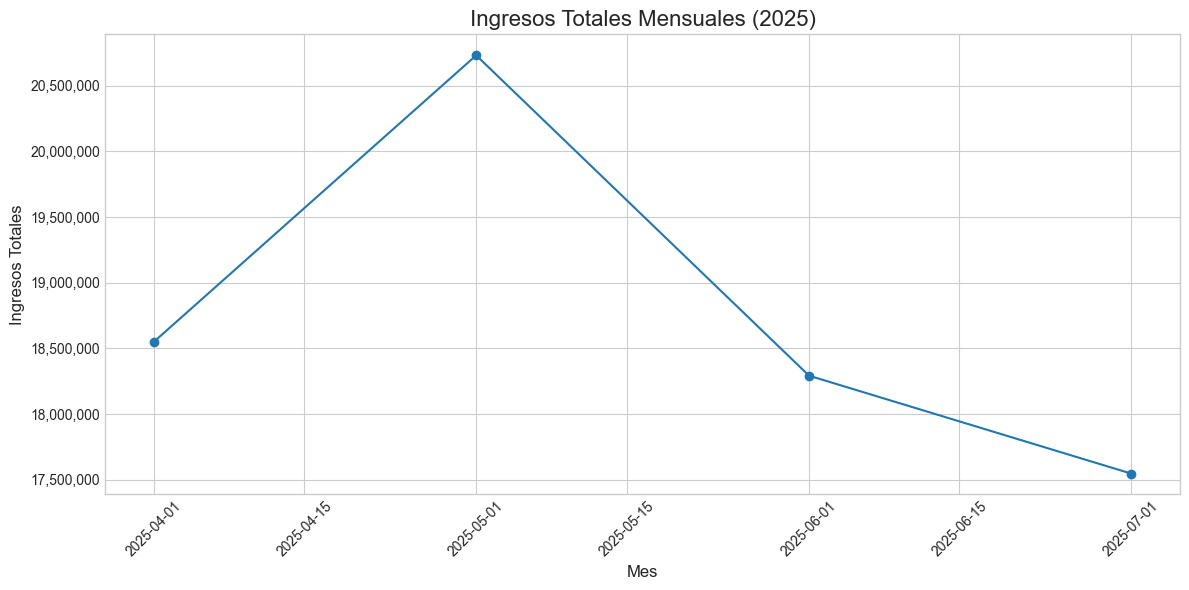

Observación: La gráfica muestra la evolución de los ingresos. Con solo 4 puntos de datos, es difícil ver una tendencia clara, pero es el primer paso fundamental.


In [9]:
print("Iniciando análisis visual...")

# Configuración de los gráficos
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))

# Graficar la serie de Ingresos Totales
plt.plot(df_master.index, df_master['Ingresos_Totales'], marker='o', linestyle='-')

# Añadir títulos y etiquetas
plt.title('Ingresos Totales Mensuales (2025)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ingresos Totales', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Observación: La gráfica muestra la evolución de los ingresos. Con solo 4 puntos de datos, es difícil ver una tendencia clara, pero es el primer paso fundamental.")

### Paso 2.2: Análisis de Correlación

In [10]:
print("\nCalculando la matriz de correlación...")

# Calculamos la correlación de todos los ítems con 'Ingresos_Totales'
correlations = df_master.corr()['Ingresos_Totales'].sort_values()

# Excluimos la correlación de 'Ingresos_Totales' consigo misma (que es 1.0)
correlations = correlations.drop('Ingresos_Totales')

print("✅ Matriz de correlación calculada.")

# Visualización de las correlaciones más fuertes (positivas y negativas)
print("\n--- Top 10 Correlaciones Más Negativas (Candidatos Principales) ---")
# Una correlación negativa fuerte es lo que buscamos: a medida que el inventario de un ítem baja, los ingresos suben.
display(correlations.head(10))

print("\n--- Top 10 Correlaciones Más Positivas ---")
# Una correlación positiva puede indicar ítems que se acumulan cuando las ventas son altas por otras razones, o ítems de baja rotación.
display(correlations.tail(10))


Calculando la matriz de correlación...
✅ Matriz de correlación calculada.

--- Top 10 Correlaciones Más Negativas (Candidatos Principales) ---


INV_LIMPIA_ESTUFA_1_L                             -0.987576
INV_LIMPIA_ESTUFA_GARRAFA                         -0.974630
INV_DETERGENTE_LIQUIDO_1L                         -0.971850
INV_AMBIENTADOR_SPRAY_FRUTAS_AMAZONICAS_60_ML     -0.961090
INV_ALCOHOL_GLICERINADO_GAL                       -0.950347
INV_QUITA_GRASA_GARRAFA                           -0.949976
INV_AMBIENTADOR_SPRAY_FRUTAS_AMAZONICAS_250_ML    -0.934378
INV_ACIDO_BORICO_LB                               -0.926879
INV_JABON_DE_MANOS_Y_CUERPO_FRUTOS_ROJOS_500_mL   -0.920651
INV_AMBIENTADOR_SPRAY_FRUTAS_AMAZONICAS_125_ML    -0.918893
Name: Ingresos_Totales, dtype: float64


--- Top 10 Correlaciones Más Positivas ---


INV_VARSOL_MED_GAL       NaN
INV_VASELINA__X_400_GR   NaN
INV_VASELINA_1_2_GALON   NaN
INV_VASELINA_1_4_LIBRA   NaN
INV_VASELINA_60_GR       NaN
INV_VASELINA_GALON       NaN
INV_VASELINA_X_200_GR    NaN
INV_VASELINA_X_800_GR    NaN
INV_VENENO_GARRAFA       NaN
INV_ZABRA                NaN
Name: Ingresos_Totales, dtype: float64


### Paso 2.3: Identificación de "Ítems Candidatos"
Basado en el análisis de correlación, podemos crear una lista de nuestros principales candidatos para el modelado


In [11]:
umbral_correlacion = -0.5
items_candidatos = correlations[correlations < umbral_correlacion]

print(f"\n\nSe han identificado {len(items_candidatos)} ítems candidatos con una correlación inferior a {umbral_correlacion}.")
print("Estos son los productos cuyo inventario decreciente se asocia más fuertemente con un aumento en los ingresos totales.")
print("Serán las variables más importantes para nuestro modelo en la Fase 3.")
print("-" * 70)
display(items_candidatos)



Se han identificado 74 ítems candidatos con una correlación inferior a -0.5.
Estos son los productos cuyo inventario decreciente se asocia más fuertemente con un aumento en los ingresos totales.
Serán las variables más importantes para nuestro modelo en la Fase 3.
----------------------------------------------------------------------


INV_LIMPIA_ESTUFA_1_L                           -0.987576
INV_LIMPIA_ESTUFA_GARRAFA                       -0.974630
INV_DETERGENTE_LIQUIDO_1L                       -0.971850
INV_AMBIENTADOR_SPRAY_FRUTAS_AMAZONICAS_60_ML   -0.961090
INV_ALCOHOL_GLICERINADO_GAL                     -0.950347
                                                   ...   
INV_CREOLINA_TRIPLE_LIT                         -0.546569
INV_COCOAMIDA                                   -0.535437
INV_VENENO_1_L_C_PISTOLA                        -0.513959
INV_LIMPIA_VIDRIOS_GALON                        -0.505623
INV_TAPA_28_SEGURIDAD                           -0.505369
Name: Ingresos_Totales, Length: 74, dtype: float64

## FASE 3: Modelado para identificar items importantes



Utilizar un modelo de Machine Learning (Random Forest) para cuantificar la importancia de cada ítem de inventario como predictor de los ingresos totales.

In [12]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

### Paso 3.1: Preparar los Datos para el Modelo

In [13]:
print("Preparando los datos para el modelado...")

# La variable 'y' es nuestro objetivo: lo que queremos predecir.
y = df_master['Ingresos_Totales']

# Las variables 'X' son nuestros predictores: todas las columnas de inventario.
X = df_master.drop('Ingresos_Totales', axis=1)

print(f"✅ Datos preparados: {X.shape[1]} variables predictoras (ítems) y {len(y)} observaciones (meses).")



Preparando los datos para el modelado...
✅ Datos preparados: 745 variables predictoras (ítems) y 4 observaciones (meses).


### Paso 3.2: Entrenar el Modelo de Random Forest

In [14]:
print("\nEntrenando el modelo de Random Forest...")

# Instanciamos el modelo. n_estimators es el número de árboles en el bosque.
# random_state asegura que los resultados sean reproducibles.
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenamos el modelo con nuestros datos
model.fit(X, y)

print("✅ Modelo entrenado exitosamente.")


Entrenando el modelo de Random Forest...
✅ Modelo entrenado exitosamente.


### Paso 3.3: Extraer y Visualizar la Importancia de las Variables

In [15]:
n_productos_ver = 100


Extrayendo la importancia de las variables (ítems)...

--- Top 15 Ítems Más Importantes para Predecir Ingresos ---


,item,importance
589,INV_PERFUME_LACOSTE_WHITE_MASC_GR,0.020408
381,INV_HUMIDIFICADOR_FLORAL_HERBAL,0.020227
309,INV_FRAGANCIA_LAVANDA_FAB,0.020062
475,INV_LIMPIA_VIDRIOS_1_L_PISTOLA,0.019755
604,INV_PERFUME_ONE_MILLION_LUCKY_MASC_GR,0.019755
...,...,...
225,INV_DIFUSOR_BERRIES_GR,0.001015
598,INV_PERFUME_L´IMMENSITE_MASC_GR,0.000927
295,INV_FRAGANCIA_CARRO_NUEVO_GR,0.000927
543,INV_PERFUME_BLUE_SEDUCTION_MASC_GR,0.000927



--- Gráfico de Importancia de los Ítems ---


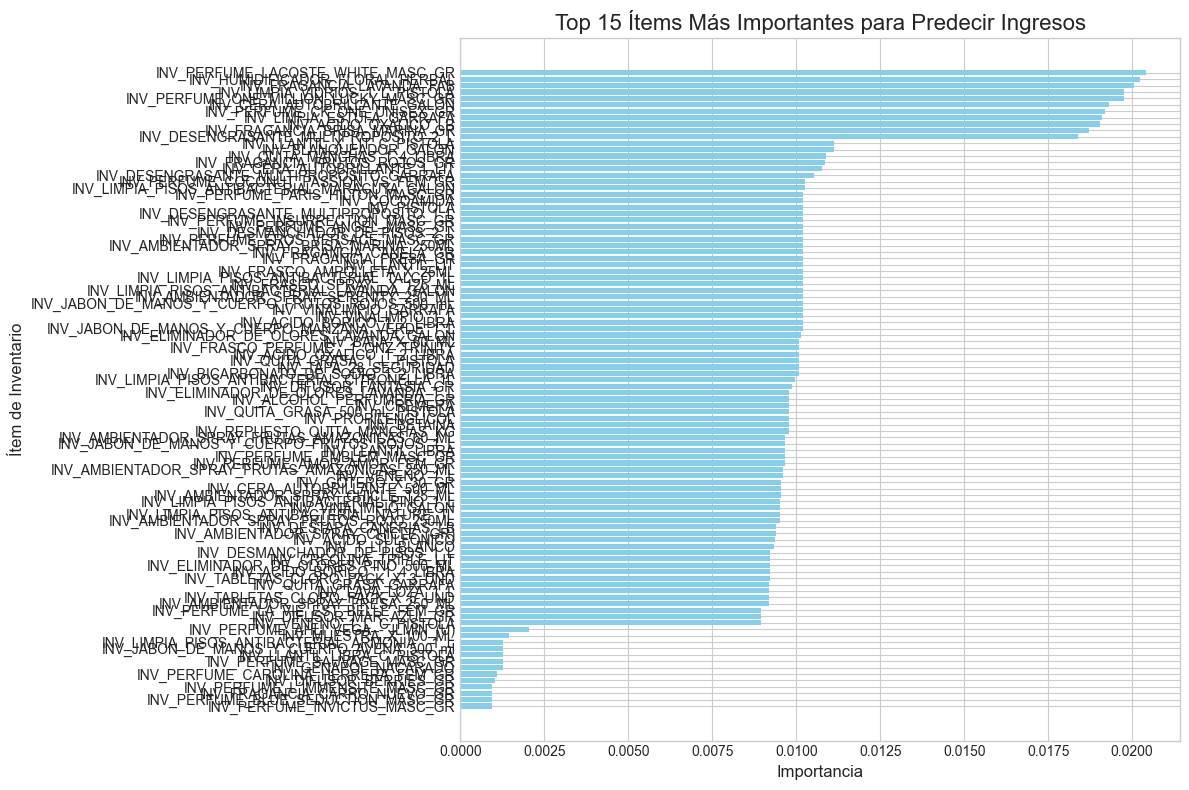

In [16]:
print("\nExtrayendo la importancia de las variables (ítems)...")

# Creamos un DataFrame con los nombres de los ítems y su importancia
feature_importances = pd.DataFrame({
    'item': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Mostramos los 15 ítems más importantes
print("\n--- Top 15 Ítems Más Importantes para Predecir Ingresos ---")
display(feature_importances.head(n_productos_ver))

# Visualización de los ítems más importantes
print("\n--- Gráfico de Importancia de los Ítems ---")

# Seleccionamos el top 15 para el gráfico
top_features = feature_importances.head(n_productos_ver)

plt.figure(figsize=(12, 8))
plt.barh(top_features['item'], top_features['importance'], color='skyblue')
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Ítem de Inventario', fontsize=12)
plt.title('Top 15 Ítems Más Importantes para Predecir Ingresos', fontsize=16)
plt.gca().invert_yaxis() # Poner el más importante arriba
plt.tight_layout()
plt.show()

### Paso 3.4 Puente importancia - correlación

In [55]:
# --- PASO 3.4 (NUEVO): Puente entre Importancia y Correlación ---

print("Construyendo el puente entre la importancia del modelo y la correlación teórica...")

# 1. Asegurémonos de tener ambos resultados como Series de Pandas
# (Ya los calculaste en las celdas anteriores)
importances_series = feature_importances.set_index('item')['importance']
correlations_series = correlations # Ya es una Serie de la Fase 2

# 2. Combinar ambos resultados en un único DataFrame
df_combinado = pd.DataFrame({
    'Importancia_RF': importances_series,
    'Correlacion': correlations_series
}).dropna() # Usamos dropna por si algún ítem no tiene ambos valores

# 3. Aplicar el filtro dual:
#    - Primero, filtramos por la teoría: solo ítems con correlación negativa.
#    - Opcional: Podemos añadir un umbral para la correlación si queremos que sea significativa (ej. < -0.2)
#    - Luego, ordenamos por la importancia del modelo para priorizar.

umbral_corr = -0.4 # Umbral de correlación negativa (puedes ajustarlo)

items_clave_filtrados = df_combinado[
    df_combinado['Correlacion'] < umbral_corr
].sort_values(by='Importancia_RF', ascending=False)


print(f"\\n--- Ítems Clave (Potentes y Coherentes) ---")
print(f"Se encontraron {len(items_clave_filtrados)} ítems con correlación < {umbral_corr}, ordenados por importancia.")
display(items_clave_filtrados.head(20)) # Mostramos los 20 principales

# 4. Generar la lista final de ítems para la Fase 4
key_items_final = items_clave_filtrados.index.tolist()

# Ahora, en tu Paso 4.1, en lugar de usar la lista 'key_items', usarías 'key_items_final'.

Construyendo el puente entre la importancia del modelo y la correlación teórica...
\n--- Ítems Clave (Potentes y Coherentes) ---
Se encontraron 88 ítems con correlación < -0.4, ordenados por importancia.


,Importancia_RF,Correlacion
INV_FRAGANCIA_LAVANDA_FAB,0.020062,-0.872399
INV_LIMPIA_ESTUFA_GARRAFA,0.019102,-0.974630
INV_ACIDO_OXALICO_LB,0.019056,-0.668284
INV_FRAGANCIA_BRISA_MARINA_GR,0.018717,-0.909897
INV_DESENGRASANTE_MULTIPROPOSITO_2_L,0.018405,-0.818597
INV_DESENGRASANTE_MULTIPROPOSITO_GARRAFA,0.010543,-0.490821
INV_LIMPIA_PISOS_ANTIBACTERIAL_MARACUYA_GALON,0.010268,-0.638531
INV_DESMANCHADOR_DE_PISOS_2_L,0.010204,-0.798779
INV_ACIDO_BORICO_1_2_LIBRA,0.010204,-0.491672
INV_JABON_DE_MANOS_Y_CUERPO_FRUTOS_ROJOS_500_mL,0.010204,-0.920651


## FASE 4: Modelo proyección ventas

Construir un modelo de pronóstico que utilice los "ítems clave" identificados en la Fase 3 para proyectar los ingresos futuros.

In [17]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

### Paso 4.1: Seleccionar los Ítems Clave

In [38]:
N_TOP_ITEMS = 88
key_items_final = feature_importances.head(N_TOP_ITEMS)['item'].tolist()

print(f"--- Ítems Clave Seleccionados para el Modelo de Proyección (Top {N_TOP_ITEMS}) ---")
print(key_items_final)


--- Ítems Clave Seleccionados para el Modelo de Proyección (Top 88) ---
['INV_PERFUME_LACOSTE_WHITE_MASC_GR', 'INV_HUMIDIFICADOR_FLORAL_HERBAL', 'INV_FRAGANCIA_LAVANDA_FAB', 'INV_LIMPIA_VIDRIOS_1_L_PISTOLA', 'INV_PERFUME_ONE_MILLION_LUCKY_MASC_GR', 'INV_CERA_AUTOBRILLANTE_GALON', 'INV_PERFUME_CK_ONE_UNISEX_GR', 'INV_LIMPIA_ESTUFA_GARRAFA', 'INV_ACIDO_OXALICO_LB', 'INV_FRAGANCIA_BRISA_MARINA_GR', 'INV_DESENGRASANTE_MULTIPROPOSITO_2_L', 'INV_LLANTIL_X_LIT_C_PISTOLA', 'INV_BLANQUEADOR_GALON', 'INV_QUITA_MANCHAS_1_4_LIBRA', 'INV_FRAGANCIA_FRUTOS_ROJOS_GR', 'INV_CERA_AUTOBRILLANTE_1_LIT', 'INV_DESENGRASANTE_MULTIPROPOSITO_GARRAFA', 'INV_PERFUME_COCONUT_PASSION_VS_FEM_GR', 'INV_LIMPIA_PISOS_ANTIBACTERIAL_MARACUYA_GALON', 'INV_PERFUME_PARIS_HILTON_MASC_GR', 'INV_COCOAMIDA', 'INV_PISTOLA', 'INV_DESENGRASANTE_MULTIPROPOSITO_1_L', 'INV_PERFUME_INSURRECTION_MASC_GR', 'INV_PERFUME_ANGEL_MASC_GR', 'INV_DESMANCHADOR_DE_PISOS_2_L', 'INV_PERFUME_EROS_VERSACE_MASC_GR', 'INV_AMBIENTADOR_SPRAY_BRISA_MARI

### Paso 4.2: Entrenar el Modelo Final de Proyección

In [39]:
print("\nPreparando datos y entrenando el modelo final de proyección...")

# 'y' sigue siendo nuestro objetivo
y_final = df_master['Ingresos_Totales']

# 'X' ahora contiene únicamente las columnas de nuestros ítems clave
X_final = df_master[key_items_final]

# Instanciamos y entrenamos un nuevo modelo con este conjunto de datos enfocado
projection_model = RandomForestRegressor(n_estimators=100, random_state=42)
projection_model.fit(X_final, y_final)

print("✅ Modelo final de proyección entrenado exitosamente.")


Preparando datos y entrenando el modelo final de proyección...
✅ Modelo final de proyección entrenado exitosamente.


### Paso 4.3: Crear un Escenario de Inventario Futuro

In [40]:
# Para predecir los ingresos del próximo mes, necesitamos una ESTIMACIÓN
# de cuál será el inventario de nuestros ítems clave en ese mes.
#
# ESTRATEGIA: Como un simple punto de partida, asumiremos que el inventario
# del próximo mes para cada ítem clave será igual a su promedio histórico.
# En un caso real, podrías usar proyecciones de inventario más sofisticadas.

In [41]:
print("\nCreando un escenario de inventario para el próximo mes...")

future_inventory_scenario = X_final.mean().to_frame().transpose()

print("--- Escenario de Inventario para la Proyección (usando promedios) ---")
display(future_inventory_scenario)




Creando un escenario de inventario para el próximo mes...
--- Escenario de Inventario para la Proyección (usando promedios) ---


,INV_PERFUME_LACOSTE_WHITE_MASC_GR,INV_HUMIDIFICADOR_FLORAL_HERBAL,INV_FRAGANCIA_LAVANDA_FAB,INV_LIMPIA_VIDRIOS_1_L_PISTOLA,INV_PERFUME_ONE_MILLION_LUCKY_MASC_GR,INV_CERA_AUTOBRILLANTE_GALON,INV_PERFUME_CK_ONE_UNISEX_GR,INV_LIMPIA_ESTUFA_GARRAFA,INV_ACIDO_OXALICO_LB,INV_FRAGANCIA_BRISA_MARINA_GR,...,INV_ACIDO_BORICO__1_4_LIBRA,INV_TABLETAS_CLORO_PACK_X_3_UND,INV_QUITA_GRASA_GARRAFA,INV_LAVA_LOZA_1_L,INV_TABLETAS_CLORO_PACK_X_5_UND,INV_AMBIENTADOR_SPRAY_FRESA_250_ML,INV_PERFUME_LA_VIE_EST_BELLE_FEM_GR,INV_DIFUSOR_MAR_AZUL_GR,INV_VENENO_1_L_C_PISTOLA,INV_PERFUME_AHLI_VEGA_-_ILMIN_(U)
0,123.5,1060.0,4777.25,16.5,176.4,3.75,138.0,2.75,-0.5,979.25,...,20.75,21.75,6.0,32.5,15.0,1.5,218.5,411.0,-3.25,31.25


### Paso 4.4: Realizar la Proyección de Ingresos

In [29]:
print("\nRealizando la proyección de ingresos...")

# Usamos el modelo entrenado para predecir los ingresos con el escenario futuro
predicted_income = projection_model.predict(future_inventory_scenario)

# El resultado es un array, extraemos el primer valor
projected_value = predicted_income[0]

print("\n" + "="*50)
print("              PROYECCIÓN DE INGRESOS              ")
print("="*50)
print(f"La proyección de ingresos para el próximo mes es: ${projected_value:,.2f}")
print("="*50)
print("\nADVERTENCIA: Este es el resultado de un flujo de trabajo de demostración.")
print("Debido a la pequeña cantidad de datos (4 meses), este número no debe considerarse")
print("un pronóstico estadísticamente válido, sino una prueba de que el modelo funciona.")


Realizando la proyección de ingresos...

              PROYECCIÓN DE INGRESOS              
La proyección de ingresos para el próximo mes es: $18,408,282.82

ADVERTENCIA: Este es el resultado de un flujo de trabajo de demostración.
Debido a la pequeña cantidad de datos (4 meses), este número no debe considerarse
un pronóstico estadísticamente válido, sino una prueba de que el modelo funciona.


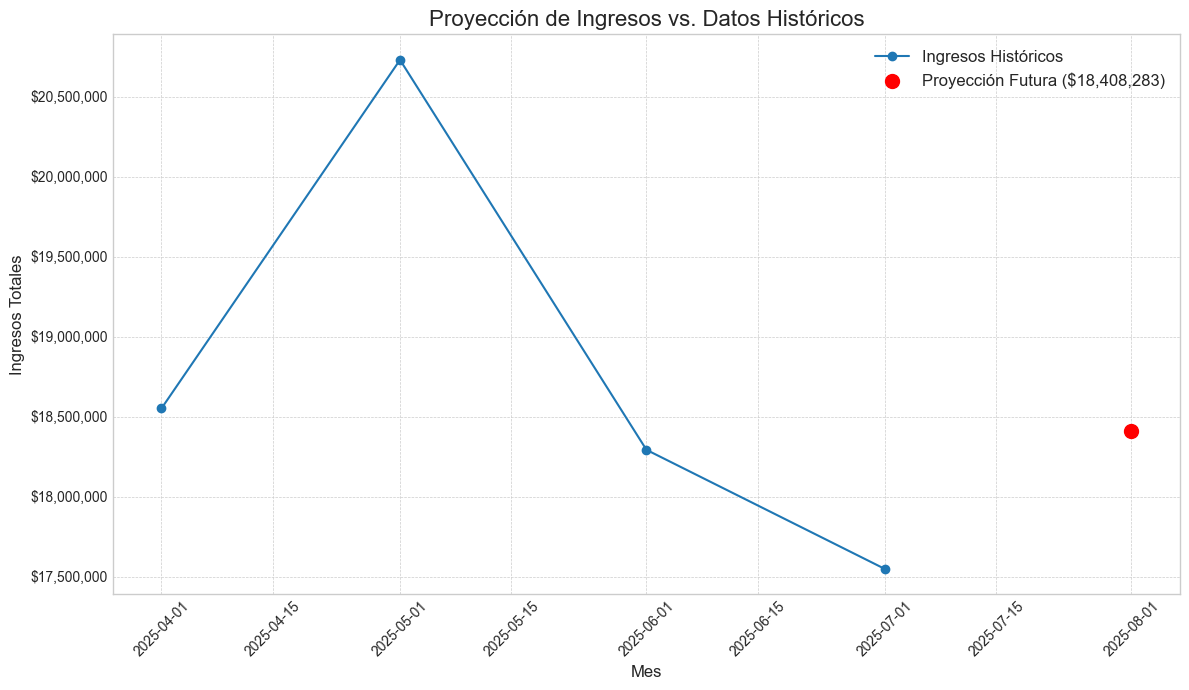

In [42]:
# Celda para Visualización 1: Proyección Histórica
import matplotlib.pyplot as plt
import pandas as pd

# Datos históricos (estas variables ya existen en tu notebook)
historical_dates = y_final.index
historical_income = y_final.values

# Crear la fecha para el próximo mes
future_date = historical_dates[-1] + pd.DateOffset(months=1)

# Crear el gráfico
plt.figure(figsize=(12, 7))
plt.plot(historical_dates, historical_income, marker='o', linestyle='-', label='Ingresos Históricos')
plt.plot(future_date, projected_value, 'ro', markersize=10, label=f'Proyección Futura (${projected_value:,.0f})')

# Formato y títulos
plt.title('Proyección de Ingresos vs. Datos Históricos', fontsize=16)
plt.ylabel('Ingresos Totales', fontsize=12)
plt.xlabel('Mes', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()

# Guardar y mostrar el gráfico
plt.savefig('proyeccion_historico.png')
plt.show()

\n--- Creando Escenarios de Inventario ---
Proyección Pesimista: $18,695,498
Proyección Promedio:   $18,408,283
Proyección Optimista:  $19,170,785


C:\Users\wild-\AppData\Local\Temp\ipykernel_28244\1433006521.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Escenario', y='Ingreso_Proyectado', data=df_scenarios, palette='viridis')


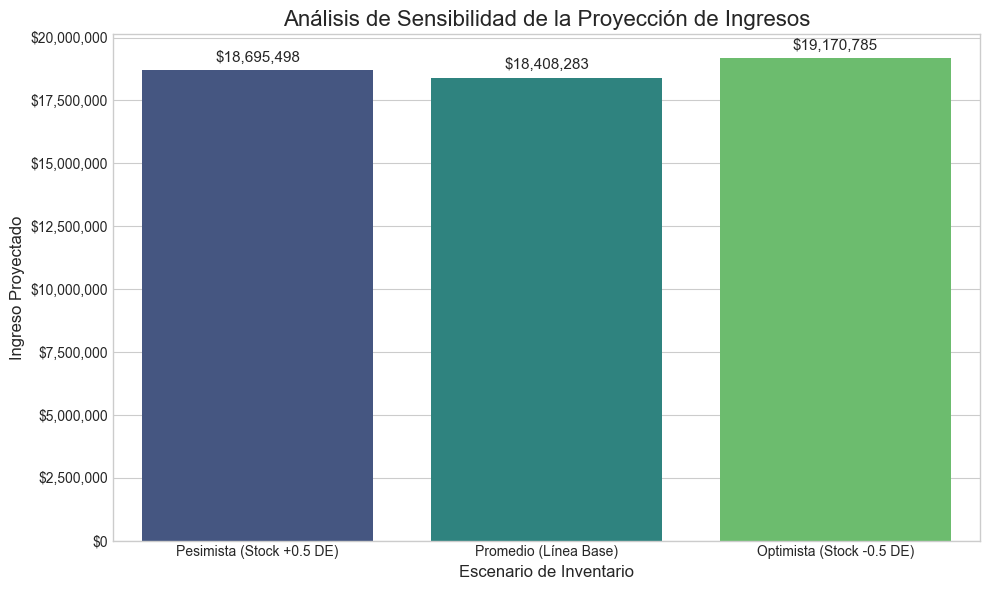

In [56]:
# Celda para Visualización 2: Análisis de Escenarios
import seaborn as sns

print("\\n--- Creando Escenarios de Inventario ---")

# Tomamos el promedio y la desviación estándar del inventario de ítems clave
mean_inventory = X_final.mean()
std_inventory = X_final.std()

# Creamos los escenarios
# Usamos 0.5 * std para una variación moderada. Puedes ajustar este factor.
scenario_optimistic = (mean_inventory - 2 * std_inventory).to_frame().T
scenario_baseline = mean_inventory.to_frame().T
scenario_pessimistic = (mean_inventory + 2 * std_inventory).to_frame().T

# Realizamos las predicciones para cada escenario
pred_optimistic = projection_model.predict(scenario_optimistic)[0]
pred_baseline = projected_value # Ya la teníamos
pred_pessimistic = projection_model.predict(scenario_pessimistic)[0]

# Preparamos los datos para el gráfico
scenarios_data = {
    'Escenario': ['Pesimista (Stock +0.5 DE)', 'Promedio (Línea Base)', 'Optimista (Stock -0.5 DE)'],
    'Ingreso_Proyectado': [pred_pessimistic, pred_baseline, pred_optimistic]
}
df_scenarios = pd.DataFrame(scenarios_data)

print(f"Proyección Pesimista: ${pred_pessimistic:,.0f}")
print(f"Proyección Promedio:   ${pred_baseline:,.0f}")
print(f"Proyección Optimista:  ${pred_optimistic:,.0f}")


# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Escenario', y='Ingreso_Proyectado', data=df_scenarios, palette='viridis')

# Formato y títulos
plt.title('Análisis de Sensibilidad de la Proyección de Ingresos', fontsize=16)
plt.ylabel('Ingreso Proyectado', fontsize=12)
plt.xlabel('Escenario de Inventario', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Añadir etiquetas a las barras
for p in barplot.patches:
    barplot.annotate(f"${p.get_height():,.0f}",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points',
                     fontsize=11)

plt.tight_layout()
plt.savefig('analisis_escenarios.png')
plt.show()

In [47]:
# PRE-REQUISITO: Asegúrate de que las siguientes variables de tu notebook ya estén cargadas:
# - df_master: Tu DataFrame maestro con todos los datos.
# - key_items_final: La lista con los nombres de los ítems clave que ya filtraste.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Tabla de Cantidades Históricas para Ítems Clave ---")

# 1. Seleccionar solo los ítems clave del DataFrame maestro
df_tabla_cantidades = df_master[key_items_final]

# 2. Transponer la tabla para mejor legibilidad (ítems como filas)
df_tabla_transpuesta = df_tabla_cantidades.T

# 3. Formatear las fechas en las columnas para que sean más cortas
df_tabla_transpuesta.columns = df_tabla_transpuesta.columns.strftime('%Y-%m')

# 4. Añadir columnas con estadísticas descriptivas para cada ítem
df_tabla_transpuesta['Promedio'] = df_tabla_cantidades.mean().values
df_tabla_transpuesta['Desv_Est'] = df_tabla_cantidades.std().values
df_tabla_transpuesta['Mínimo'] = df_tabla_cantidades.min().values
df_tabla_transpuesta['Máximo'] = df_tabla_cantidades.max().values

# Mostramos la tabla formateada
# Usamos un styler para mejorar la visualización de los números
display(df_tabla_transpuesta.style.format("{:,.1f}").background_gradient(cmap='viridis', axis=1, subset=df_tabla_transpuesta.columns[:-4]))




--- Tabla de Cantidades Históricas para Ítems Clave ---


Mes_Ano,2025-04,2025-05,2025-06,2025-07,Promedio,Desv_Est,Mínimo,Máximo
INV_PERFUME_LACOSTE_WHITE_MASC_GR,156.5,132.5,108.5,96.5,123.5,26.6,96.5,156.5
INV_HUMIDIFICADOR_FLORAL_HERBAL,359.0,"1,331.0","1,275.0","1,275.0","1,060.0",468.1,359.0,"1,331.0"
INV_FRAGANCIA_LAVANDA_FAB,"5,292.0","3,239.0","5,589.0","4,989.0","4,777.2","1,054.3","3,239.0","5,589.0"
INV_LIMPIA_VIDRIOS_1_L_PISTOLA,20.0,20.0,16.0,10.0,16.5,4.7,10.0,20.0
INV_PERFUME_ONE_MILLION_LUCKY_MASC_GR,200.4,200.4,152.4,152.4,176.4,27.7,152.4,200.4
INV_CERA_AUTOBRILLANTE_GALON,-2.0,7.0,6.0,4.0,3.8,4.0,-2.0,7.0
INV_PERFUME_CK_ONE_UNISEX_GR,144.0,144.0,132.0,132.0,138.0,6.9,132.0,144.0
INV_LIMPIA_ESTUFA_GARRAFA,3.0,0.0,4.0,4.0,2.8,1.9,0.0,4.0
INV_ACIDO_OXALICO_LB,-1.0,-4.0,-4.0,7.0,-0.5,5.2,-4.0,7.0
INV_FRAGANCIA_BRISA_MARINA_GR,968.0,742.0,952.0,"1,255.0",979.2,210.7,742.0,"1,255.0"


In [61]:
# PRE-REQUISITO: Asegúrate de que las siguientes variables de tu notebook ya estén cargadas:
# - X_final: DataFrame con los ítems clave como columnas.
# - key_items_final: Lista con los nombres de los ítems clave.
# - projection_model: Tu modelo de Random Forest ya entrenado.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# --- HERRAMIENTA 1: Gráfico de Sensibilidad para un Ítem Clave ---

# Elige qué ítem de tu lista de 'key_items_final' quieres analizar.
# Por defecto, analizaremos el más importante (índice 0).
# Puedes cambiar el índice a 1, 2, etc., para analizar otros productos.
item_a_analizar = key_items_final[62]
print(f"--- Análisis de Sensibilidad para el Ítem: {item_a_analizar} ---")

# Creamos un escenario base con el inventario promedio para todos los ítems clave.
escenario_base = X_final.mean().to_frame().T

# Creamos un rango de cantidades para el ítem que estamos analizando.
# Iremos desde 0 hasta un 50% más que el máximo histórico para ver el efecto completo.
rango_cantidad = np.linspace(0, X_final[item_a_analizar].max() * 1.5, 50)

# Calculamos la proyección para cada cantidad en el rango.
proyecciones = []
for cantidad in rango_cantidad:
    escenario_actual = escenario_base.copy()
    escenario_actual[item_a_analizar] = cantidad
    prediccion = projection_model.predict(escenario_actual)[0]
    proyecciones.append(prediccion)

# Graficamos los resultados.
plt.figure(figsize=(12, 7))
plt.plot(rango_cantidad, proyecciones, marker='.', linestyle='-')
plt.title(f'Sensibilidad de Ingresos a la Cantidad de\\n"{item_a_analizar}"', fontsize=16)
plt.xlabel(f'Cantidad en Inventario de "{item_a_analizar}"', fontsize=12)
plt.ylabel('Ingreso Total Proyectado', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('sensibilidad_item_clave.png')
plt.show()


--- Análisis de Sensibilidad para el Ítem: INV_DETERGENTE_LIQUIDO_2L ---


KeyError: 'INV_DETERGENTE_LIQUIDO_2L'

In [66]:

# --- HERRAMIENTA 2: Función Interactiva de Proyección ---

def proyectar_ingresos_escenario(**nuevas_cantidades):
    """
    Proyecta los ingresos basado en nuevas cantidades de inventario para ítems clave.

    Uso:
    proyectar_ingresos_escenario(
        INV_Item_A=100,
        INV_Item_B=50
    )
    Los ítems no especificados usarán su valor promedio histórico como base.
    """
    # Empezamos con el escenario promedio
    escenario = X_final.mean().to_dict()

    # Actualizamos el escenario con las cantidades que el usuario especifique
    for item, cantidad in nuevas_cantidades.items():
        if item in escenario:
            escenario[item] = cantidad
        else:
            print(f"Advertencia: El ítem '{item}' no es un predictor clave en el modelo y será ignorado.")

    # Convertimos el diccionario a un DataFrame para la predicción
    df_escenario = pd.DataFrame([escenario])

    # Realizamos la predicción
    prediccion = projection_model.predict(df_escenario)[0]

    print("\\n--- Proyección para tu Escenario Personalizado ---")
    for item, cantidad in nuevas_cantidades.items():
        if item in escenario:
            print(f"  - Cantidad de {item}: {cantidad}")
    print("-------------------------------------------------")
    print(f"Ingreso Proyectado: ${prediccion:,.2f}")
    print("-------------------------------------------------")

    return prediccion

# --- Ejemplo de Uso de la Función ---
print("\\n--- Ejemplo de cómo usar la función de proyección ---")
# Simulemos un escenario donde el inventario de los dos productos más importantes es bajo.
item_1 = key_items_final[4]


# Creamos un diccionario para el escenario
escenario_ejemplo = {
    item_1: 600,  # Cantidad baja para el producto 1

}

# Llamamos a la función con el escenario
_ = proyectar_ingresos_escenario(**escenario_ejemplo)

\n--- Ejemplo de cómo usar la función de proyección ---
\n--- Proyección para tu Escenario Personalizado ---
  - Cantidad de INV_DESENGRASANTE_MULTIPROPOSITO_2_L: 600
-------------------------------------------------
Ingreso Proyectado: $18,468,227.11
-------------------------------------------------
